In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
filled_df = pd.read_csv('filled_data.csv')

In [27]:
filled_df

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [28]:
filled_df['TotalSF'] = filled_df['BsmtFinSF1'] + filled_df['BsmtFinSF2'] + filled_df['1stFlrSF'] + filled_df['2ndFlrSF']


In [33]:
filled_df['TotalBath'] = filled_df['FullBath'] + filled_df['HalfBath'] * 0.5 + filled_df['BsmtFullBath'] + filled_df['BsmtHalfBath'] * 0.5

In [35]:
filled_df['TotalPorchSF'] = filled_df['OpenPorchSF'] + filled_df['EnclosedPorch'] + filled_df['3SsnPorch'] + filled_df['ScreenPorch']

In [36]:
filled_df['HouseAge'] = filled_df['YrSold'] - filled_df['YearBuilt']

In [39]:
filled_df['RemodAge'] = filled_df['YrSold'] - filled_df['YearRemodAdd']

In [46]:
filled_df['IsRemodeled'] = (filled_df['YearRemodAdd'] > filled_df['YearBuilt']).astype(int)

In [48]:
filled_df['IsNew'] = (filled_df['YrSold'] == filled_df['YearBuilt']).astype(int)

In [55]:
filled_df['HasPool'] = (filled_df['PoolArea'] > 0).astype(int)

In [64]:
filled_df['Has2ndFloor'] = (filled_df['2ndFlrSF'] > 0).astype(int)

In [65]:
filled_df['HasGarage'] = (filled_df['GarageArea'] > 0).astype(int)

In [66]:
filled_df['HasBsmt'] = (filled_df['TotalBsmtSF'] > 0).astype(int)

In [67]:
filled_df['HasFireplace'] = (filled_df['Fireplaces'] > 0).astype(int)

In [68]:
filled_df['NeighborhoodMedianPrice'] = filled_df.groupby('Neighborhood')['SalePrice'].transform('median')

In [75]:
filled_df['AvgRoomSize'] = filled_df['GrLivArea'] / filled_df['TotRmsAbvGrd']

In [77]:
filled_df['HouseSz_To_LotSz'] = filled_df['GrLivArea'] / filled_df['LotArea']

<Axes: xlabel='HouseSz_To_LotSz', ylabel='SalePrice'>

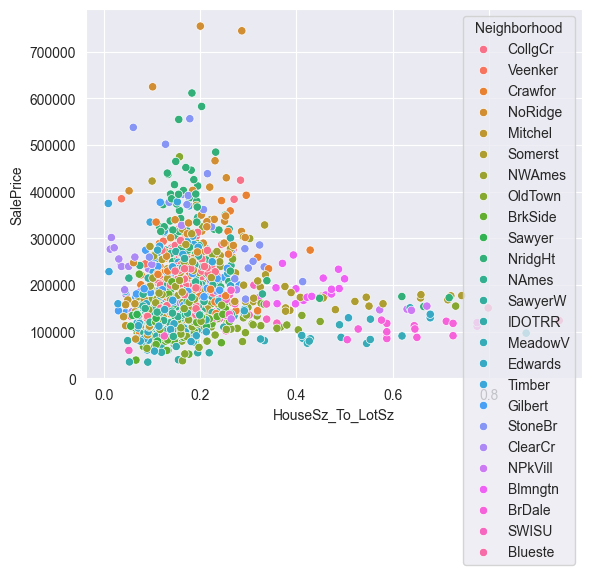

In [89]:
sns.scatterplot(x='HouseSz_To_LotSz',y='SalePrice', hue='Neighborhood', data=filled_df)

In [86]:
categorical_features = [
    "MSSubClass",
    "MSZoning",
    "Street",
    "Alley",
    "LandContour",
    "LotConfig",
    "Neighborhood",
    "Condition1",
    "Condition2",
    "BldgType",
    "HouseStyle",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Exterior2nd",
    "MasVnrType",
    "Foundation",
    "Heating",
    "CentralAir",
    "Electrical",
    "GarageType",
    "MiscFeature",
    "SaleType",
    "SaleCondition"
]

In [87]:
fdf = pd.get_dummies(filled_df, columns=categorical_features)


In [88]:
fdf

,Unnamed: 0,Id,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,65.0,8450,Reg,Gtl,7,5,2003,2003,...,False,False,False,True,False,False,False,False,True,False
1,1,2,80.0,9600,Reg,Gtl,6,8,1976,1976,...,False,False,False,True,False,False,False,False,True,False
2,2,3,68.0,11250,IR1,Gtl,7,5,2001,2002,...,False,False,False,True,False,False,False,False,True,False
3,3,4,60.0,9550,IR1,Gtl,7,5,1915,1970,...,False,False,False,True,True,False,False,False,False,False
4,4,5,84.0,14260,IR1,Gtl,8,5,2000,2000,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1456,62.0,7917,Reg,Gtl,6,5,1999,2000,...,False,False,False,True,False,False,False,False,True,False
1456,1456,1457,85.0,13175,Reg,Gtl,6,6,1978,1988,...,False,False,False,True,False,False,False,False,True,False
1457,1457,1458,66.0,9042,Reg,Gtl,7,9,1941,2006,...,False,False,False,True,False,False,False,False,True,False
1458,1458,1459,68.0,9717,Reg,Gtl,5,6,1950,1996,...,False,False,False,True,False,False,False,False,True,False


<Axes: xlabel='HouseAge', ylabel='SalePrice'>

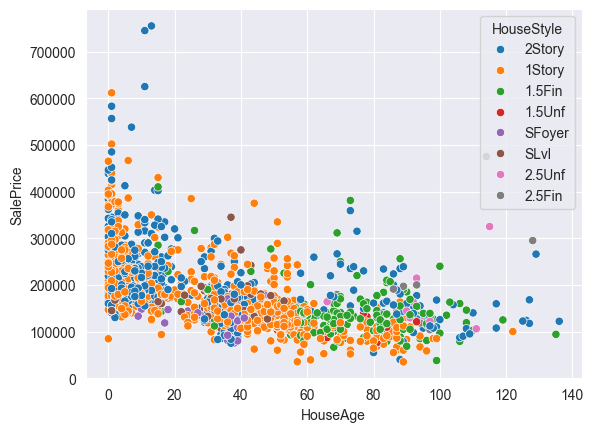

In [91]:
sns.scatterplot(x='HouseAge', y='SalePrice', hue='HouseStyle', data=filled_df)

<Axes: xlabel='MiscVal', ylabel='SalePrice'>

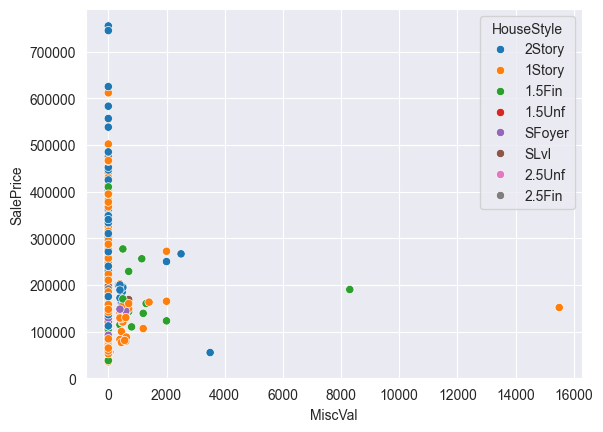

In [92]:
sns.scatterplot(x='MiscVal', y='SalePrice', hue='HouseStyle', data=filled_df)